# 📂 Financial Data Analytics: Forecasting, Variance Analysis, and Customer Insights  

# 📚 1. Introduction


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with the purpose, and problem statement, and contribution of this project to the sphere of knowledge. The project overview is also discussed in this section.

</div>

## Project Overview 
____
This project leverages a **comprehensive financial dataset** containing **transaction records, customer details, and card information** spanning the **2010s decade**. The dataset is sourced from **Kaggle** and contains **1 million records** with **21 columns**. The dataset is used to perform **financial forecasting, variance analysis, and customer insights extraction**. 

🔗 **Reference Dataset:** [Financial Transactions Dataset: Analytics (Kaggle)](https://www.kaggle.com)  

The goal is to **demonstrate expertise in SQL, Python, Machine Learning, and Power BI** by performing:  
- **Financial forecasting** for revenue and expense prediction.  
- **Variance analysis** to compare budgeted vs. actual financials.  
- **Customer insights extraction** for spending behavior segmentation.  
- **Business intelligence reporting** using interactive dashboards.  


## Key Objectives 
___


By leveraging SQL for data extraction and transformation, Python for machine learning, and Power BI for visualization, the project aims to provide actionable financial insights.

- **Financial Forecasting:** The goal is to build predictive models to forecast future revenue and expenses using historical transaction data. This involves extracting and cleaning financial data with SQL, training time-series models (ARIMA, XGBoost, LSTMs), and evaluating model performance using metrics such as RMSE, MAPE, and R² scores.

- **Variance Analysis:** The project will compare budgeted vs. actual financial performance to identify key variance drivers. Using SQL, variance percentages will be calculated across customers, merchants, and spending categories. This analysis will help detect high-variance spending patterns and uncover seasonal trends impacting financial deviations.

- **Customer Spending & Segmentation:** To understand customer behavior, clustering algorithms (K-Means, DBSCAN) will be used to categorize customers based on spending patterns. The analysis will differentiate between high-value and low-value customers by evaluating transaction trends and creating customer profiles based on spending frequency, transaction volume, and merchant categories.

- **Business Intelligence & Reporting:** The final objective is to develop a Power BI dashboard for real-time financial tracking and variance monitoring. SQL-based financial data will be integrated into Power BI to design interactive visualizations for revenue, expense, and variance trends. The dashboard will provide financial decision-makers with insights into spending behavior, revenue trends, and key financial variances.

By addressing these objectives, the project will demonstrate a strong foundation in SQL, Python, Machine Learning, and Power BI, ensuring a data-driven approach to financial analysis and forecasting.


### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📚 2. Data Integration and SQL Setup

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section focuses on loading the financial transactions dataset into a SQL database, establishing relationships between tables, and ensuring data integrity. The SQL setup is crucial for subsequent data analysis, forecasting, and visualization tasks.

</div>


## Dataset Schema & Relationships 
___

The dataset consists of multiple interconnected files, requiring structured relationships to ensure seamless data integration. The table below outlines the **primary keys, foreign keys, and purpose** of each dataset component.  

| **Dataset**                | **Primary Key**     | **Foreign Key(s) & Relationships**           | **Purpose** |
|----------------------------|--------------------|----------------------------------------------|-------------|
| `transactions_data.csv`     | `transaction_id`   | `user_id`, `card_id`, `mcc_code`            | Tracks revenue, expenses, and spending details. |
| `cards_data.csv`           | `card_id`          | `user_id`                                   | Links transactions to customers via cards. |
| `users_data.csv`           | `user_id`          | None                                        | Provides user demographics and account details. |
| `mcc_codes.json`           | `mcc_code`         | None                                        | Maps merchant category codes to business types. |
| `train_fraud_labels.json`  | `transaction_id`   | None                                        | Labels transactions as fraudulent (1) or legitimate (0). |




## Dataset Overview
___

1. **Users Table:**   
Contains key demographic and financial information such as current_age, retirement_age, income details, total_debt, and credit_score. These fields are crucial for profiling customers and can serve as features for predicting spending patterns, risk, and future financial behavior.

2. **Cards Table:**   
Links directly to the users table through user_id and provides additional insights into customer behavior by including details like card_brand, card_type, credit_limit, and security-related attributes (e.g., has_chip, card_on_dark_web). These features can be used to segment customers or detect anomalies in card usage.

3. **MCC Codes Table:**   
Offers a mapping of merchant category codes to their descriptions, which helps classify transactions. By integrating this table with transactions, you can derive categorical features that highlight spending trends across different merchant types.

4. **Transactions Table:**   
Serves as the central repository for tracking financial activity, linking users and cards. It records transaction dates, amounts, merchant details, and even error logs. With these, you can compute aggregated metrics (like total spending per customer or monthly revenue trends) and conduct variance analysis (budgeted vs. actual amounts).

5. **Fraud Labels Table:**  
Provides a target variable for supervised learning tasks, specifically fraud detection. By associating each transaction with a fraud label, you can build models to predict fraudulent behavior based on the integrated features from the other tables.

The first step is to load the dataset into a SQL database and establish relationships between the tables to facilitate data retrieval and analysis.

## Dataset Loading 
___


#### 1. Loading dataset: users_data

In [2]:
# Load users data
users = pd.read_csv(r'/Users/teslim/Large_data_set/users_data.csv')
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [3]:
# Check the data types of the columns
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [4]:
# Check for missing values
users.isnull().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

It is crucial to convert the columns to their appropriate data types based on the nature of the data. This step ensures accurate analysis and processing of the information

In [5]:
def clean_users_data(data):
    data['per_capita_income'] = data['per_capita_income'].str.replace("$", "").str.replace(",", "").astype(float)
    data['yearly_income'] = data['yearly_income'].str.replace("$", "").str.replace(",", "").astype(float)
    data['total_debt'] = data['total_debt'].str.replace("$", "").str.replace(",", "").astype(float)
    
    return data

# Clean users data
users_data = clean_users_data(users)


In [6]:
# check the data types after cleaning
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


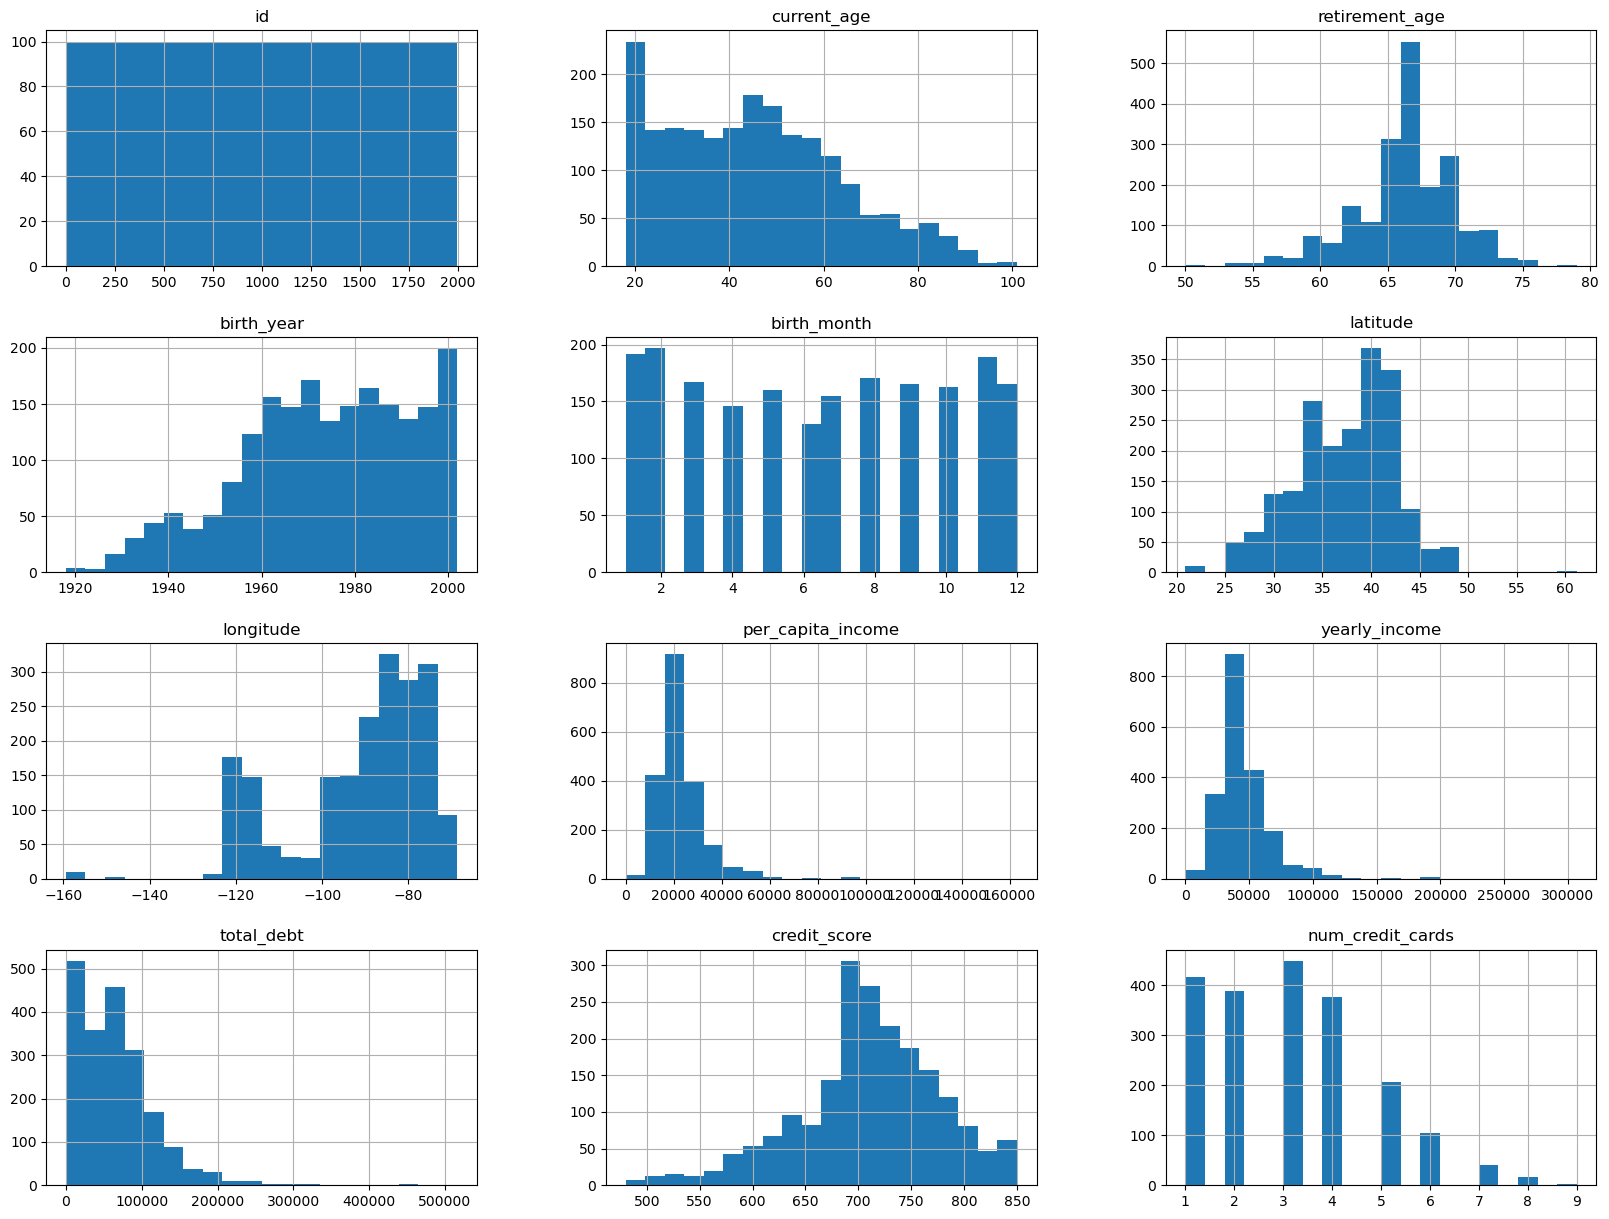

In [15]:
users_data.hist(bins=20, figsize=(20, 15))
plt.show()


____

#### 2. Loading dataset: card_data

In [16]:
# Load card data
cards = pd.read_csv(r'/Users/teslim/Large_data_set/cards_data.csv')
cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [17]:
# check the data types
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [18]:
# Check for missing values
cards.isnull().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

Converting columns to appropriate data types for accurate analysis and processing

In [19]:
import pandas as pd

def clean_cards_data(data):
    """
    Cleans the cards data:
    1. Converts 'expires' and 'acct_open_date' to datetime.
    2. Cleans and converts 'credit_limit' to float.
    3. Converts 'year_pin_last_changed' to integer (since it contains only years).
    4. Handles missing values.
    """
    # Convert 'expires' to datetime (assuming format is 'MM/YYYY')
    data['expires'] = pd.to_datetime(data['expires'], format='%m/%Y', errors='coerce')
    

    data['credit_limit'] = (data['credit_limit'].str.replace(r'[$,]', '', regex=True).astype(float))
    
    # Convert 'acct_open_date' to datetime (assuming format is 'MM/DD/YYYY')
    data['acct_open_date'] = pd.to_datetime(data['acct_open_date'], format='%m/%d/%Y', errors='coerce')
    
    # Convert 'year_pin_last_changed' to integer (since it contains only years)
    data['year_pin_last_changed'] = pd.to_numeric(data['year_pin_last_changed'], errors='coerce').astype('Int64')  # Use 'Int64' for nullable integer type
    
    # Handle missing values (optional, depending on your use case)
    data['expires'] = data['expires'].fillna(pd.NaT)  # Fill missing datetime with NaT
    data['credit_limit'] = data['credit_limit'].fillna(0.0)  # Fill missing credit limits with 0.0
    data['acct_open_date'] = data['acct_open_date'].fillna(pd.NaT)  # Fill missing datetime with NaT
    data['year_pin_last_changed'] = data['year_pin_last_changed'].fillna(0)  # Fill missing years with 0
    
    return data

# Clean cards data
cards_data = clean_cards_data(cards)

In [20]:
cards_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     6146 non-null   int64         
 1   client_id              6146 non-null   int64         
 2   card_brand             6146 non-null   object        
 3   card_type              6146 non-null   object        
 4   card_number            6146 non-null   int64         
 5   expires                6146 non-null   datetime64[ns]
 6   cvv                    6146 non-null   int64         
 7   has_chip               6146 non-null   object        
 8   num_cards_issued       6146 non-null   int64         
 9   credit_limit           6146 non-null   float64       
 10  acct_open_date         0 non-null      datetime64[ns]
 11  year_pin_last_changed  6146 non-null   Int64         
 12  card_on_dark_web       6146 non-null   object        
dtypes: 

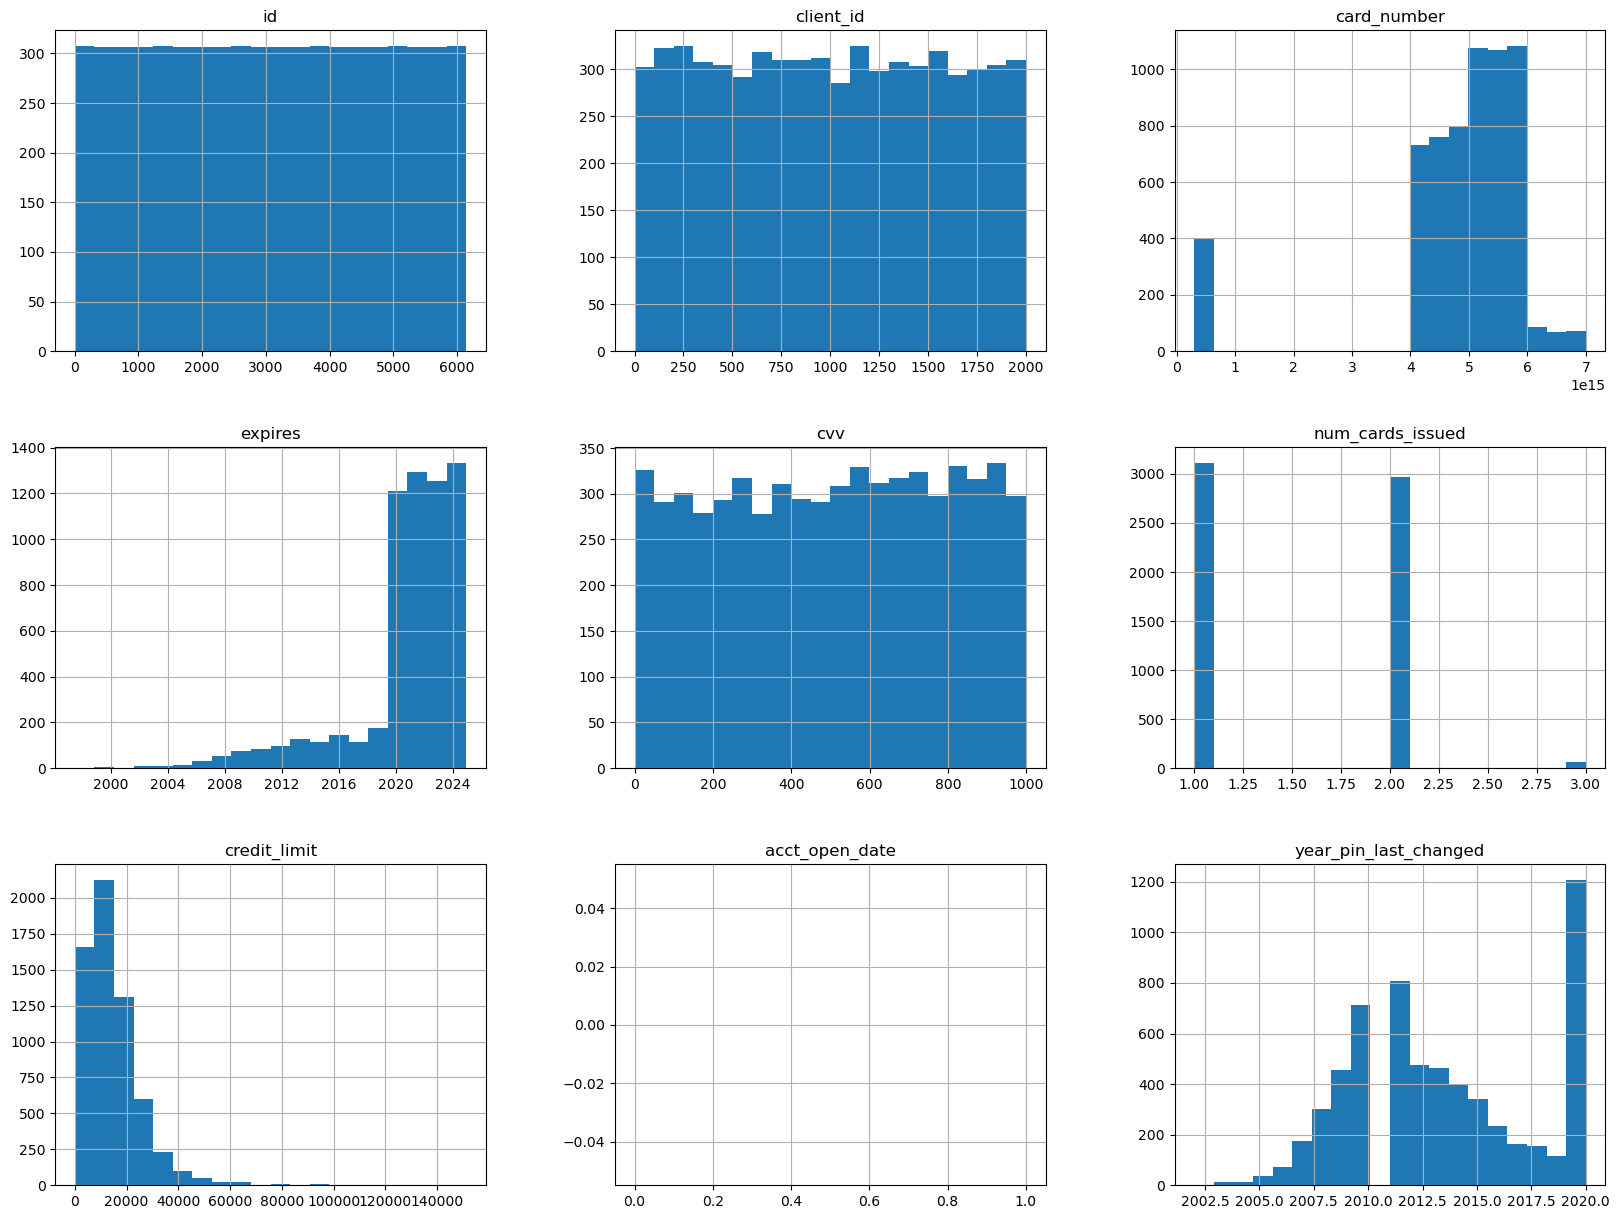

In [21]:
cards_data.hist(bins=20, figsize=(20, 15))
plt.show()

____

#### 3. Loading dataset: mcc_codes_data

In [22]:
# Load mcc codes data
mcc_codes_data = pd.read_json("/Users/teslim/Large_data_set/mcc_codes.json", orient='index')
mcc_codes_data.head()

,0
5812,Eating Places and Restaurants
5541,Service Stations
7996,"Amusement Parks, Carnivals, Circuses"
5411,"Grocery Stores, Supermarkets"
4784,Tolls and Bridge Fees


In [23]:
mcc_codes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 5812 to 5733
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       109 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [24]:
# check for missing values
mcc_codes_data.isnull().sum()

0    0
dtype: int64

In [ ]:
mcc_codes_data.value_counts()

0                                             
Passenger Railways                                2
Accounting, Auditing, and Bookkeeping Services    1
Miscellaneous Metals                              1
Podiatrists                                       1
Package Stores, Beer, Wine, Liquor                1
                                                 ..
Drinking Places (Alcoholic Beverages)             1
Doctors, Physicians                               1
Discount Stores                                   1
Digital Goods - Media, Books, Apps                1
Women's Ready-To-Wear Stores                      1
Name: count, Length: 108, dtype: int64

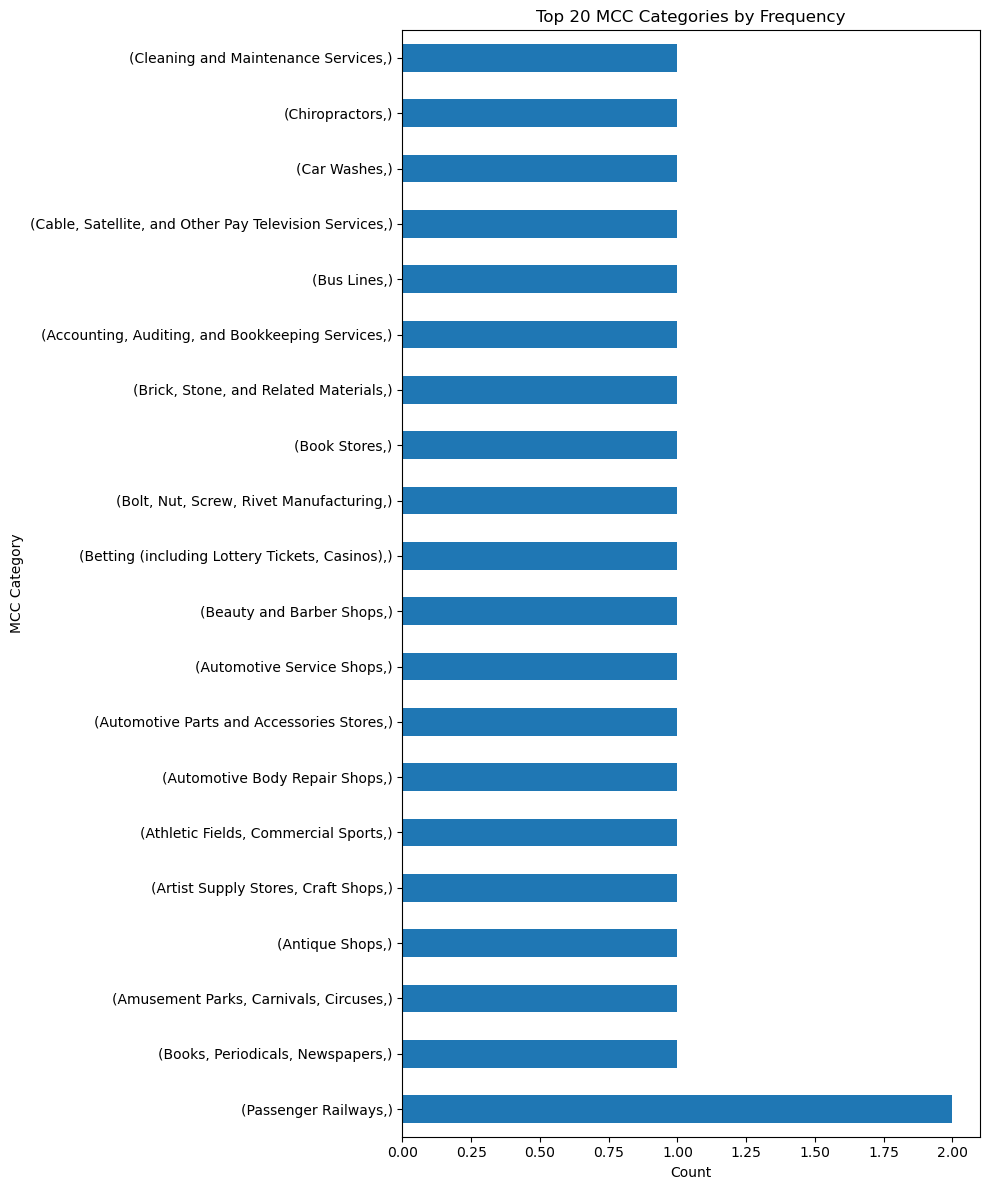

In [34]:
# Sort the data by count in descending order
sorted_data = mcc_codes_data.value_counts().sort_values(ascending=False)

# Take the top 20 categories for better readability
top_categories = sorted_data.head(20)

# Create a horizontal bar chart
plt.figure(figsize=(10, 12))
top_categories.plot(kind='barh')
plt.title('Top 20 MCC Categories by Frequency')
plt.xlabel('Count')
plt.ylabel('MCC Category')
plt.tight_layout()
plt.show()

___

#### 4. Load dataset: Transaction_data

In [33]:
# load transactions data
transactions = pd.read_csv(r'/Users/teslim/Large_data_set/transactions_data.csv', parse_dates=['date'])
transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [35]:
# check the data types
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          object        
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.2+ GB


In [36]:
# check for missing values
transactions.isnull().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

This dataset contains transaction details such as transaction_id, transaction_date, user_id, card_id, merchant_id, mcc_code, amount, and other relevant information, and it is important that dollar amounts are stored as numeric values for financial analysis, thus, this will be converted to the appropriate data type using the function below.

In [37]:
# Clean transactions data
def clean_transactions_data(transactions_df):
	"""
	Cleans the transactions data using vectorized operations:
	1. Removes dollar signs, commas, and parentheses from the `amount` column and converts it to float.
	2. Converts the `date` column to a datetime object.
	3. Handles missing values in `merchant_state`, `zip`, and `errors` columns.
	4. Returns a cleaned DataFrame.
	"""
	# Clean the `amount` column
	transactions_df['amount'] = (
		transactions_df['amount']
		.str.replace('$', '', regex=False)  # Remove dollar signs
		.str.replace(',', '', regex=False)  # Remove commas
		.str.replace('(', '-', regex=False)  # Replace opening parenthesis with negative sign
		.str.replace(')', '', regex=False)  # Remove closing parenthesis
		.astype(float)  # Convert to float
	)
	
	# Convert the `date` column to datetime
	transactions_df['date'] = pd.to_datetime(transactions_df['date'])
	
	# Handle missing values in `merchant_state`, `zip`, and `errors`
	transactions_df['merchant_state'] = transactions_df['merchant_state'].fillna('Unknown')
	transactions_df['zip'] = transactions_df['zip'].fillna('Unknown')
	transactions_df['errors'] = transactions_df['errors'].fillna('No Errors')
	
	# Convert specific columns to integers
	int_columns = ['id', 'client_id', 'card_id', 'merchant_id', 'mcc']
	transactions_df[int_columns] = transactions_df[int_columns].astype(int)
	
	# Rename columns to match the database schema (optional)
	transactions_df = transactions_df.rename(columns={
		'id': 'transaction_id',
		'client_id': 'user_id',
		'date': 'transaction_date',
		'mcc': 'mcc_code'
	})
	
	return transactions_df


In [38]:
# Clean transactions data
transactions_data = clean_transactions_data(transactions)

In [39]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int64         
 1   transaction_date  datetime64[ns]
 2   user_id           int64         
 3   card_id           int64         
 4   amount            float64       
 5   use_chip          object        
 6   merchant_id       int64         
 7   merchant_city     object        
 8   merchant_state    object        
 9   zip               object        
 10  mcc_code          int64         
 11  errors            object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.2+ GB


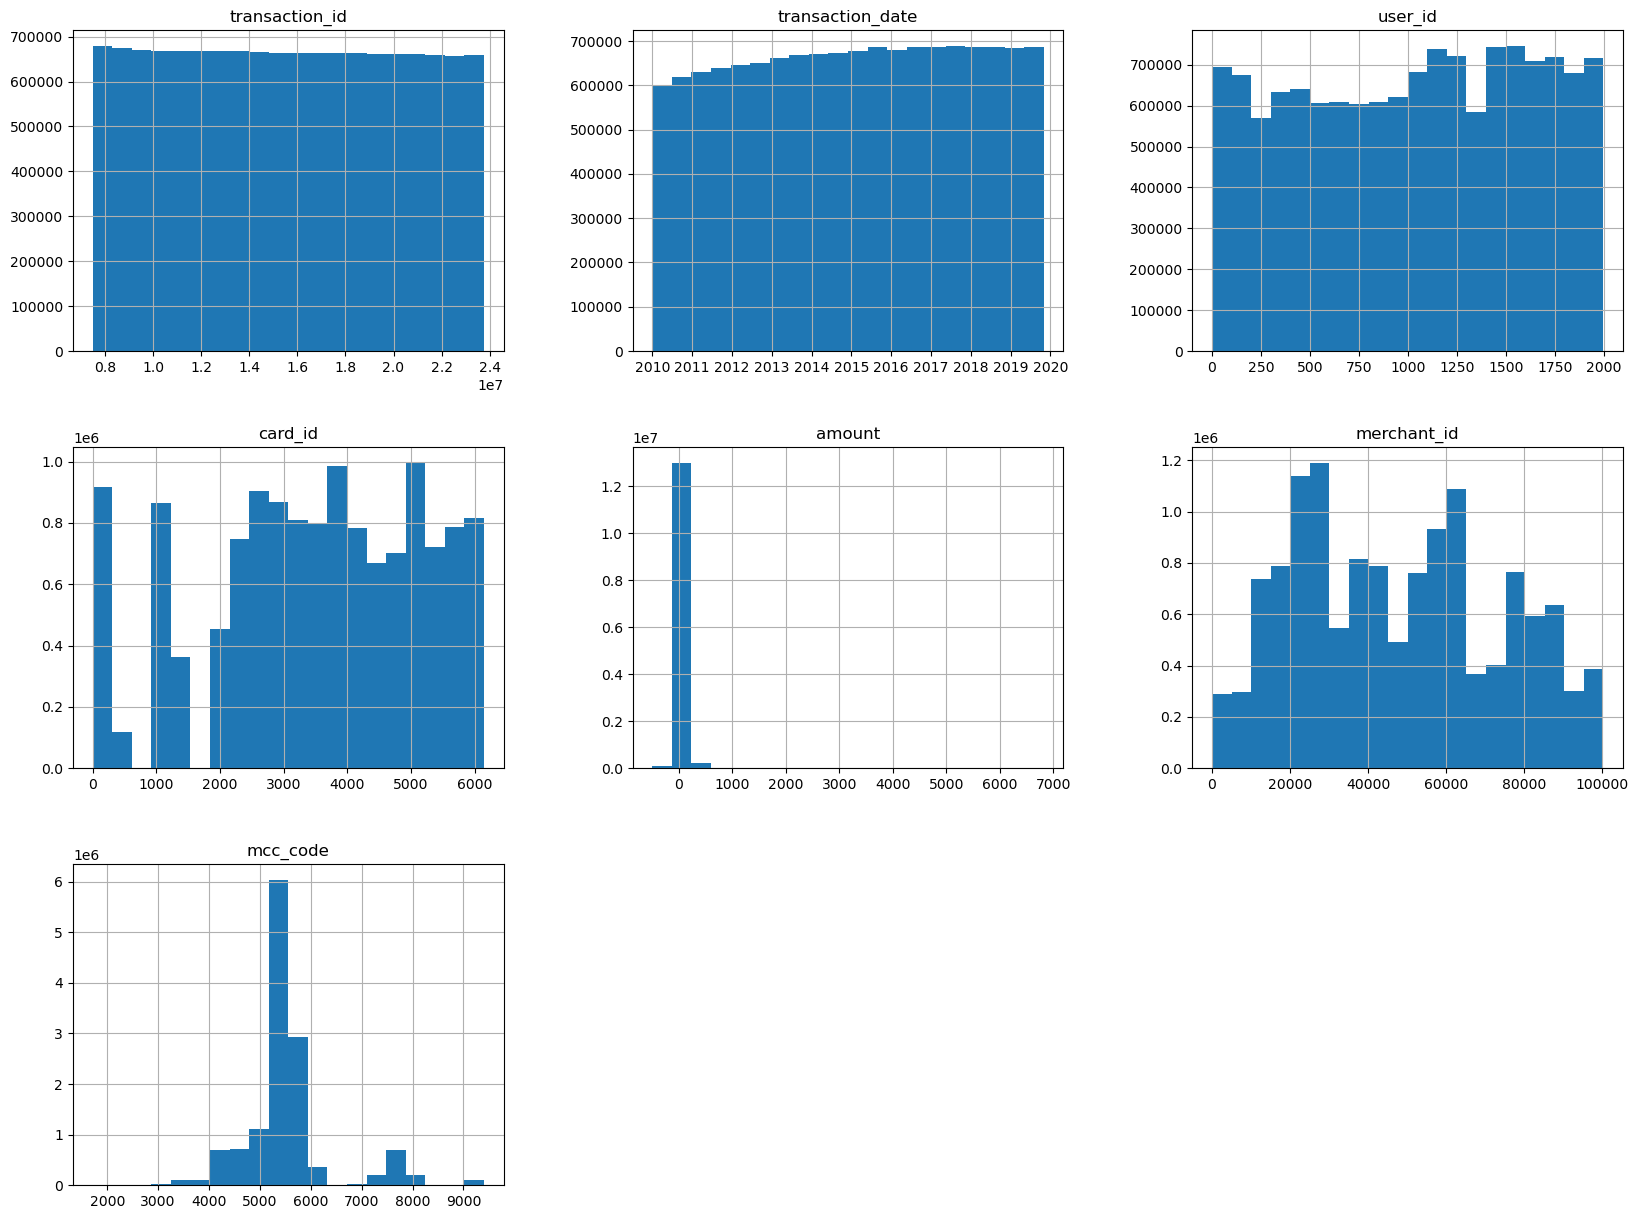

In [40]:
transactions_data.hist(bins=20, figsize=(20, 15))
plt.show()

____

#### 5. Loading dataset: Train_fraud_data

In [41]:
# Load fraud labels data
fraud_labels_data = pd.read_json(r'/Users/teslim/Large_data_set/train_fraud_labels.json')
fraud_labels_data.head()

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No


In [42]:
fraud_labels_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8914963 entries, 10649266 to 15151926
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   target  object
dtypes: object(1)
memory usage: 136.0+ MB


In [43]:
# check for missing values
fraud_labels_data.isnull().sum()

target    0
dtype: int64

In [44]:
fraud_labels_data.value_counts()

target
No        8901631
Yes         13332
Name: count, dtype: int64

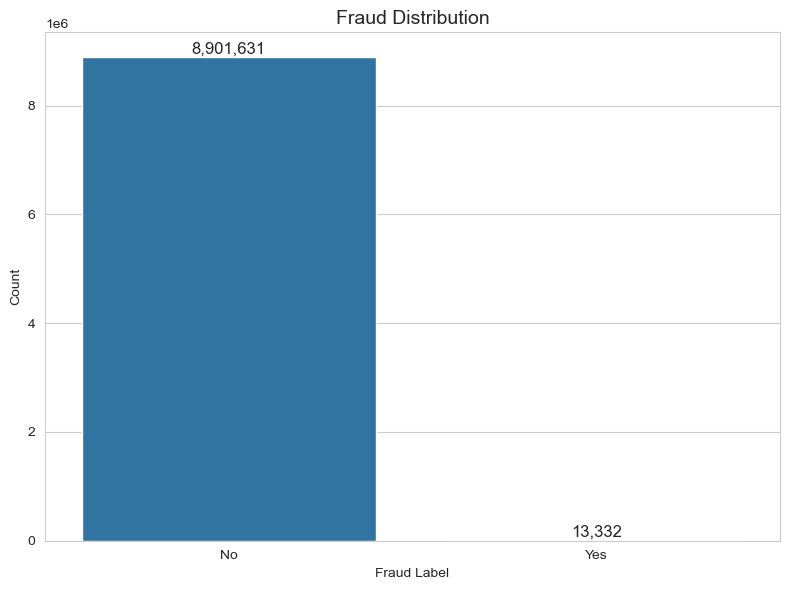

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.countplot(x=fraud_labels_data['target'])

# Add title and labels
plt.title('Fraud Distribution', fontsize=14)
plt.xlabel('Fraud Label')
plt.ylabel('Count')

# Add count labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## SQL Database Initialization
___

The next step is the Database Initialization, which involves creating a new database, establishing connections, and loading the dataset into the database. This process is crucial for subsequent data analysis, forecasting, and visualization tasks.

In [7]:
import os
import mysql.connector
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Retrieve MySQL credentials from environment variables
MYSQL_USER = os.getenv("MYSQL_USERNAME")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")
MYSQL_HOST = os.getenv("MYSQL_HOST")

# Validate credentials
if not MYSQL_USER or not MYSQL_PASSWORD or not MYSQL_HOST:
    raise ValueError("Missing MySQL credentials. Please check your .env file.")
else:
    print("MySQL credentials loaded successfully.")

MySQL credentials loaded successfully.


## Connect to SQL Database
___

After initializing the database, the next step is to connect to the SQL database using Python. This connection is essential for querying the database, extracting data, and performing various data analysis tasks.

In [51]:
# Database connection function
def connect_to_db():
    return mysql.connector.connect(
        host=MYSQL_HOST,
        user=MYSQL_USER,
        password=MYSQL_PASSWORD
    )

# Databse creation function
def create_database():
    conn = connect_to_db()
    cursor = conn.cursor()
    cursor.execute("CREATE DATABASE IF NOT EXISTS financial_transactions_db")
    print("Database 'financial_transactions_db' created successfully and connected.")
    conn.close()

# Connect to the database function
def connect_to_db_with_db():
    return mysql.connector.connect(
        host=MYSQL_HOST,
        user=MYSQL_USER,
        password=MYSQL_PASSWORD,
        database="financial_transactions_db"
    )

# Call the functions
create_database()
db = connect_to_db_with_db()

Database 'financial_transactions_db' created successfully and connected.


## Create Tables
___

Followinng the set up of the  database, the next step is create the tables in the database, and insert data. The tables will be created based on the schema and relationships defined earlier.

The tables will be created:
- users
- cards
- mcc_codes
- transactions
- fraud_labels

In [43]:
def create_users_table():
    """
    Creates the 'users' table in the database with the correct schema.
    """
    conn = connect_to_db_with_db()
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS users (
        user_id BIGINT UNSIGNED PRIMARY KEY, -- Ensures consistency across foreign keys
        current_age INT,
        retirement_age INT,
        birth_year INT,
        birth_month INT,
        gender VARCHAR(10),
        address VARCHAR(255),
        latitude DOUBLE PRECISION,         
        longitude DOUBLE PRECISION,        
        per_capita_income DOUBLE PRECISION, 
        yearly_income DOUBLE PRECISION,    
        total_debt DOUBLE PRECISION,       
        credit_score INT,
        num_credit_cards INT
    );
    """)
    conn.commit()
    conn.close()
    print("Table 'users' created successfully.")


In [44]:
def create_cards_table():
    """
    Creates the 'cards' table in the database with the correct schema.
    """
    conn = connect_to_db_with_db()
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS cards (
        card_id BIGINT UNSIGNED PRIMARY KEY,
        user_id BIGINT UNSIGNED NOT NULL, 
        card_brand VARCHAR(50),
        card_type VARCHAR(50),
        card_number BIGINT,
        expires DATE,
        cvv INT,
        has_chip VARCHAR(10),
        num_cards_issued INT,
        credit_limit DOUBLE PRECISION, 
        acct_open_date DATE,
        year_pin_last_changed INT,
        card_on_dark_web VARCHAR(10),
        FOREIGN KEY (user_id) REFERENCES users(user_id) ON DELETE CASCADE
    );
    """)
    conn.commit()
    conn.close()
    print("Table 'cards' created successfully.")


In [45]:
def create_mcc_codes_table():
    """
    Creates the 'mcc_codes' table in the database with merchant category codes.
    """
    conn = connect_to_db_with_db()
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS mcc_codes (
        mcc_code BIGINT UNSIGNED PRIMARY KEY,
        category_description VARCHAR(255)
    );
    """)
    conn.commit()
    conn.close()
    print("Table 'mcc_codes' created successfully.")


In [46]:
def create_transactions_table():
    """
    Creates the 'transactions' table in the database with the correct schema.
    """
    conn = connect_to_db_with_db()
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS transactions (
        transaction_id BIGINT UNSIGNED PRIMARY KEY,  
        transaction_date DATE,  
        user_id BIGINT UNSIGNED NOT NULL,  
        card_id BIGINT UNSIGNED NOT NULL,  
        amount DOUBLE PRECISION,  
        use_chip VARCHAR(50),  
        merchant_id BIGINT UNSIGNED,  
        merchant_city TEXT,  
        merchant_state VARCHAR(50),  
        zip VARCHAR(20),  
        mcc_code BIGINT UNSIGNED,  
        errors TEXT,  
        FOREIGN KEY (user_id) REFERENCES users(user_id) ON DELETE CASCADE,  
        FOREIGN KEY (card_id) REFERENCES cards(card_id) ON DELETE CASCADE,  
        FOREIGN KEY (mcc_code) REFERENCES mcc_codes(mcc_code) ON DELETE SET NULL
    );
    """)
    conn.commit()
    conn.close()
    print("Table 'transactions' created successfully.")


In [48]:
def create_fraud_table():
    """
    Creates the 'fraud_labels' table in the database.
    """
    conn = connect_to_db_with_db()
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS fraud_labels (
        transaction_id BIGINT UNSIGNED PRIMARY KEY,  
        is_fraud BOOLEAN,  
        FOREIGN KEY (transaction_id) REFERENCES transactions(transaction_id) ON DELETE CASCADE
    );
    """)
    conn.commit()
    conn.close()
    print("Table 'fraud_labels' created successfully.")


In [49]:
# Create tables
create_users_table()
create_cards_table()
create_mcc_codes_table()
create_transactions_table()
create_fraud_table()

Table 'users' created successfully.
Table 'cards' created successfully.
Table 'mcc_codes' created successfully.
Table 'transactions' created successfully.
Table 'fraud_labels' created successfully.


After creating the tables, the next step is to establish relationships between them to ensure data integrity and consistency. After that, we will proceed to the next section of inspecting the data into the tables.

## Insert Data into: User Table
___

In [30]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


In [ ]:
# Insert users data into the users table
def insert_users_data(users_df):
    """
    Inserts users' data from a DataFrame into the users table efficiently.
    """
    # Ensure column alignment
    users_df.rename(columns={'id': 'user_id'}, inplace=True)

    # Connect to the database
    conn = connect_to_db_with_db()
    cursor = conn.cursor()

    # Prepare SQL query
    sql_query = """
        INSERT IGNORE INTO users (user_id, 
                           current_age, 
                           retirement_age, 
                           birth_year, 
                           birth_month, 
                           gender, 
                           address,
                           latitude, 
                           longitude, 
                           per_capita_income, 
                           yearly_income, 
                           total_debt, 
                           credit_score, 
                           num_credit_cards)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """

    # Convert DataFrame to list of tuples (for executemany)
    data_to_insert = [
        (
            int(row['user_id']), 
            int(row['current_age']), 
            int(row['retirement_age']),
            int(row['birth_year']), 
            int(row['birth_month']), 
            row['gender'],
            row['address'], 
            float(row['latitude']), 
            float(row['longitude']),
            float(row['per_capita_income']), 
            float(row['yearly_income']), 
            float(row['total_debt']),
            int(row['credit_score']), 
            int(row['num_credit_cards'])
        )
        for _, row in users_df.iterrows()
    ]

    # Execute batch insertion for better performance
    cursor.executemany(sql_query, data_to_insert)

    # Commit and close
    conn.commit()
    conn.close()

    print("✅ Users data inserted successfully.")

# Call the function
insert_users_data(users_data)


✅ Users data inserted successfully.


##  Insert Data into: Cards Table
___

In [34]:
cards_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     6146 non-null   int64         
 1   client_id              6146 non-null   int64         
 2   card_brand             6146 non-null   object        
 3   card_type              6146 non-null   object        
 4   card_number            6146 non-null   int64         
 5   expires                6146 non-null   datetime64[ns]
 6   cvv                    6146 non-null   int64         
 7   has_chip               6146 non-null   object        
 8   num_cards_issued       6146 non-null   int64         
 9   credit_limit           6146 non-null   float64       
 10  acct_open_date         0 non-null      datetime64[ns]
 11  year_pin_last_changed  6146 non-null   Int64         
 12  card_on_dark_web       6146 non-null   object        
dtypes: 

In [ ]:
# Insert cards data into the cards table
def insert_cards_data(cards_df):
    # Connect to the database
    conn = connect_to_db_with_db()
    cursor = conn.cursor()

    # Iterate over each row in the DataFrame and insert it into the table
    cards_df.rename(columns={'id': 'card_id'}, inplace=True)
    
    for index, row in cards_df.iterrows():
        cursor.execute("""
            INSERT INTO cards (card_id, 
                               user_id, 
                               card_brand, 
                               card_type, 
                               card_number, 
                               expires, 
                               cvv, 
                               has_chip,
                               num_cards_issued, 
                               credit_limit, 
                               acct_open_date, 
                               year_pin_last_changed, 
                               card_on_dark_web)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, 
        (   int(row['card_id']), 
            int(row['client_id']), 
            row['card_brand'], 
            row['card_type'], 
            row['card_number'], 
            row['expires'], 
            row['cvv'], 
            row['has_chip'], 
            int(row['num_cards_issued']), 
            float(row['credit_limit']), 
            row['acct_open_date'], 
            int(row['year_pin_last_changed']), 
            row['card_on_dark_web']
        )
    )

    # Commit the transaction
    conn.commit()

    # Close the connection
    conn.close()

    print("✅ Cards data inserted successfully.")

# Call the function
insert_cards_data(cards_data)

✅ Cards data inserted successfully.


##  Insert Data into: MCC Codes Table
___

In [42]:
mcc_codes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 5812 to 5733
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       109 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [ ]:
# Insert mcc codes data into the mcc_codes table
def insert_mcc_codes_data(mcc_codes_df):
    # Connect to the database
    conn = connect_to_db_with_db()
    cursor = conn.cursor()

    # Iterate over each row in the DataFrame and insert it into the table
    for index, row in mcc_codes_df.iterrows():
        cursor.execute("""
            INSERT INTO mcc_codes (mcc_code, 
                                  category_description)
            VALUES (%s, %s)
        """, 
        (   index,  # Assuming `index` is the `mcc_code`
            row[0]  # Assuming the first column is `category_description`
        )
    )

    # Commit the transaction
    conn.commit()

    # Close the connection
    conn.close()

    print("✅ MCC Codes data inserted successfully.")

# Call the function
insert_mcc_codes_data(mcc_codes_data)

✅ MCC Codes data inserted successfully.


## Insert Data into: Transactions Table
____

In [45]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int64         
 1   transaction_date  datetime64[ns]
 2   user_id           int64         
 3   card_id           int64         
 4   amount            float64       
 5   use_chip          object        
 6   merchant_id       int64         
 7   merchant_city     object        
 8   merchant_state    object        
 9   zip               object        
 10  mcc_code          int64         
 11  errors            object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.2+ GB


In [ ]:
# Insert transactions data into the transactions table
def insert_transactions_data(transactions_df):
    # Connect to the database
    conn = connect_to_db_with_db()
    cursor = conn.cursor()

    # Iterate over each row in the DataFrame and insert it into the transactions table
    for index, row in transactions_df.iterrows():
        cursor.execute("""
            INSERT INTO transactions (
                transaction_id,
                transaction_date,
                user_id,
                card_id,
                amount,
                use_chip,
                merchant_id,
                merchant_city,
                merchant_state,
                zip,
                mcc_code,
                errors
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, (
            int(row['transaction_id']),
            row['transaction_date'],  # assuming the DB accepts datetime objects
            int(row['user_id']),
            int(row['card_id']),
            float(row['amount']),
            row['use_chip'],
            int(row['merchant_id']),
            row['merchant_city'],
            row['merchant_state'],
            row['zip'],
            int(row['mcc_code']),
            row['errors']
        ))

    # Commit the transaction
    conn.commit()

    # Close the connection
    conn.close()

    print("✅ Transactions data inserted successfully.")

# Call the function (assuming your DataFrame is named transactions_data)
insert_transactions_data(transactions_data)


✅ Transactions data inserted successfully.


## Insert Data into:  Train_fraud_data Table
_____


In [48]:
fraud_labels_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8914963 entries, 10649266 to 15151926
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   target  object
dtypes: object(1)
memory usage: 136.0+ MB


In [ ]:
# Insert fraud labels data into the fraud_labels table
def insert_fraud_labels_data(fraud_labels_df):
    # Map 'No' to 0 and 'Yes' to 1
    fraud_labels_df['target'] = fraud_labels_df['target'].map({'No': 0, 'Yes': 1})

    # Connect to the database
    conn = connect_to_db_with_db()
    cursor = conn.cursor()

    # Iterate over each row in the DataFrame and insert it into the table.
    # Here, the DataFrame index is used as the transaction_id and the 'target'
    # column is used as the is_fraud flag.
    for transaction_id, row in fraud_labels_df.iterrows():
        cursor.execute("""
            INSERT INTO fraud_labels (transaction_id, is_fraud)
            VALUES (%s, %s)
        """, (
            int(transaction_id),  # Use index as transaction_id
            int(row['target'])    # Convert the target value to int
        ))

    # Commit the transaction
    conn.commit()

    # Close the connection
    conn.close()

    print("✅ Fraud Labels data inserted successfully.")

# Call the function (replace `fraud_labels_data` with your DataFrame variable name)
insert_fraud_labels_data(fraud_labels_data)


✅ Fraud Labels data inserted successfully.


# 📚 3. Features Engineering 
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
In this section, we focus on feature engineering—the process of creating new, informative variables from the existing raw data. These engineered features are not directly available in the original dataset but are derived by combining and transforming columns through SQL queries. The goal is to enhance the predictive power of machine learning models and improve the accuracy of financial forecasts.
</div>

First, we reconnect to the SQL database to extract the data for feature engineering.

In [15]:
def run_query(query):
    """
    Connects to the 'financial_transactions_db' database,
    executes the provided SQL query, and returns the results as a DataFrame.
    """
    conn = mysql.connector.connect(
        host=MYSQL_HOST,
        user=MYSQL_USER,
        password=MYSQL_PASSWORD,
        database="financial_transactions_db"
    )
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(result, columns=columns)


The objective of this project is 4-fold:
1. **Financial Forecasting:** Predict future revenue and expenses using historical transaction data.
2. **Variance Analysis:** Compare budgeted vs. actual financial performance to identify key variance drivers.
3. **Customer Insights:** Understand customer behavior through spending segmentation and clustering.
4. **Business Intelligence:** Develop Power BI dashboards for real-time financial tracking and variance monitoring.

Thus, feature engineering will focus on creating variables that capture each of those objectives. The features will be derived from the transactions, users, and cards tables to provide a comprehensive view of financial activity, customer behavior, and spending patterns. Each section provides: 
- Feature List: A detailed breakdown of the features created.
- SQL Queries: To extract and transform data for use in machine learning models or BI tools.



### 1. Financial Forecasting Features Extracted
___


The purpose of financial forecasting is to predict future revenue and expenses based on historical transaction data. To achieve this, we need to create features that capture trends, seasonality, and other patterns in the financial data. The following features will be engineered for financial forecasting:



| Feature               | Description                                      | SQL Extraction                                                                 |
|-----------------------|--------------------------------------------------|-------------------------------------------------------------------------------|
| transaction_year      | Extracts the year of each transaction            | `YEAR(transaction_date)`                                                      |
| transaction_month     | Extracts the month of each transaction           | `MONTH(transaction_date)`                                                     |
| transaction_quarter   | Extracts the quarter of each transaction         | `QUARTER(transaction_date)`                                                   |
| total_revenue         | Total revenue for each time period               | `SUM(amount)`                                                                 |
| lag_1_month           | Revenue from the previous month                  | `LAG(total_revenue, 1) OVER (ORDER BY transaction_year, transaction_month)`   |
| lag_2_month           | Revenue from two months ago                      | `LAG(total_revenue, 2) OVER (ORDER BY transaction_year, transaction_month)`   |
| rolling_avg_3_months  | 3-month moving average of revenue                | `AVG(total_revenue) OVER (ORDER BY transaction_year, transaction_month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW)` |
| cumulative_revenue    | Cumulative sum of revenue                        | `SUM(total_revenue) OVER (ORDER BY transaction_year, transaction_month)`      |

In [10]:
query = """

WITH monthly_revenue AS (
    SELECT 
        YEAR(transaction_date) AS transaction_year,
        MONTH(transaction_date) AS transaction_month,
        QUARTER(transaction_date) AS transaction_quarter,
        SUM(amount) AS total_revenue
    FROM transactions
    GROUP BY transaction_year, transaction_month, transaction_quarter
)
SELECT 
    transaction_year,
    transaction_month,
    transaction_quarter,
    total_revenue,
    LAG(total_revenue, 1) OVER (ORDER BY transaction_year, transaction_month) AS lag_1_month,
    LAG(total_revenue, 2) OVER (ORDER BY transaction_year, transaction_month) AS lag_2_month,
    AVG(total_revenue) OVER (ORDER BY transaction_year, transaction_month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS rolling_avg_3_months,
    SUM(total_revenue) OVER (ORDER BY transaction_year, transaction_month) AS cumulative_revenue
FROM monthly_revenue
ORDER BY transaction_year, transaction_month;


"""

# Execute the query and display the resulting DataFrame
financial_forecasting_data = run_query(query)
financial_forecasting_data.head()

,transaction_year,transaction_month,transaction_quarter,total_revenue,lag_1_month,lag_2_month,rolling_avg_3_months,cumulative_revenue
0,2010,1,1,4372532.12,NaN,NaN,4.372532e+06,4372532.12
1,2010,2,1,4103170.24,4372532.12,NaN,4.237851e+06,8475702.36
2,2010,3,1,4539853.38,4103170.24,4372532.12,4.338519e+06,13015555.74
3,2010,4,2,4407951.33,4539853.38,4103170.24,4.350325e+06,17423507.07
4,2010,5,2,4610601.80,4407951.33,4539853.38,4.519469e+06,22034108.87


In [11]:
# Save the DataFrame to a CSV 
financial_forecasting_data.to_csv("financial_forecasting_data.csv", index=False)

### 2 . Variance Analysis Features Extracted
___



The purpise of variance analysis is to compare budgeted vs. actual financial performance to identify key variance drivers. The following features will be engineered for variance analysis:


| Feature                      | Description                                      | SQL Extraction                                                                 |
|------------------------------|--------------------------------------------------|-------------------------------------------------------------------------------|
| actual_spending              | Total actual spending per transaction            | `amount`                                                                      |
| budgeted_spending            | Estimated budgeted spending using historical averages | `AVG(amount) OVER (PARTITION BY user_id, YEAR(transaction_date), MONTH(transaction_date))` |
| variance                     | Difference between actual and budgeted spending  | `amount - budgeted_spending`                                                 |
| variance_pct                 | Percentage variance                              | `((amount - budgeted_spending) / budgeted_spending) * 100`                   |
| total_variance_by_customer   | Customer-level variance                          | `SUM(variance) OVER (PARTITION BY user_id)`                                  |
| total_variance_by_merchant   | Merchant-level variance                          | `SUM(variance) OVER (PARTITION BY mcc_code)`                                 |
| monthly_variance             | Variance grouped by time                         | `SUM(variance) OVER (PARTITION BY YEAR(transaction_date), MONTH(transaction_date))` |

In [12]:
query = """

WITH user_budget AS (
    -- Estimate budgeted spending using historical averages per user per month
    SELECT 
        user_id,
        YEAR(transaction_date) AS transaction_year,
        MONTH(transaction_date) AS transaction_month,
        AVG(amount) AS budgeted_spending
    FROM transactions
    GROUP BY user_id, transaction_year, transaction_month
),
transaction_variance AS (
    -- Calculate actual spending, variance, and variance percentage
    SELECT 
        t.transaction_id,
        t.user_id,
        t.amount AS actual_spending,
        ub.budgeted_spending,
        (t.amount - ub.budgeted_spending) AS variance,
        CASE 
            WHEN ub.budgeted_spending <> 0 THEN ((t.amount - ub.budgeted_spending) / ub.budgeted_spending) * 100 
            ELSE NULL 
        END AS variance_pct
    FROM transactions t
    LEFT JOIN user_budget ub 
    ON t.user_id = ub.user_id 
    AND YEAR(t.transaction_date) = ub.transaction_year 
    AND MONTH(t.transaction_date) = ub.transaction_month
)
SELECT 
    tv.*,
    SUM(tv.variance) OVER (PARTITION BY tv.user_id) AS total_variance_by_customer,
    SUM(tv.variance) OVER (PARTITION BY t.mcc_code) AS total_variance_by_merchant,
    SUM(tv.variance) OVER (PARTITION BY YEAR(t.transaction_date), MONTH(t.transaction_date)) AS monthly_variance
FROM transaction_variance tv
JOIN transactions t ON tv.transaction_id = t.transaction_id
ORDER BY variance_pct DESC;


"""

# Execute the query and display the resulting DataFrame
spending_variance_analysis_data = run_query(query)
spending_variance_analysis_data.head()

,transaction_id,user_id,actual_spending,budgeted_spending,variance,variance_pct,total_variance_by_customer,total_variance_by_merchant,monthly_variance
0,22756662,1727,3261.63,37.813430,3223.816570,8525.586257,3.420197e-11,6.357650e+05,-2.962089e-09
1,22453398,1081,6613.44,87.959641,6525.480359,7418.721025,-4.185097e-12,6.357650e+05,1.366401e-08
2,19431468,1147,4613.24,63.828844,4549.411156,7127.516112,-4.670753e-11,6.357650e+05,1.587452e-08
3,10711855,909,1857.46,26.045836,1831.414164,7031.504734,1.328715e-10,6.357650e+05,6.214691e-09
4,17569196,1507,455.00,6.401017,448.598983,7008.245512,-7.080558e-12,2.806425e+06,-1.064326e-08


In [13]:
# Save the DataFrame to a CSV 
spending_variance_analysis_data.to_csv("spending_variance_analysis_data.csv", index=False)

### 3 . Customer Insights Features Extracted
____


The purpose of this is to identify customer spending patterns and anomalies in the transactions data. The query calculates the budgeted spending for each user based on historical averages per user per month. It then calculates the actual spending, variance, and variance percentage for each transaction. Additionally, it calculates the total variance by customer, total variance by merchant, and monthly variance. This analysis can help identify customers with significant spending variances, merchants with high variance in transactions, and months with unusual spending patterns.



| Feature                   | Description                                      | SQL Extraction                                                                 |
|---------------------------|--------------------------------------------------|-------------------------------------------------------------------------------|
| transaction_count         | Number of transactions per user                 | `COUNT(transaction_id)`                                                       |
| total_spending            | Total amount spent per user                     | `SUM(amount)`                                                                 |
| avg_transaction_value     | Average transaction amount                      | `AVG(amount)`                                                                 |
| spending_by_category      | Spending distribution across merchant categories | `SUM(amount) OVER (PARTITION BY user_id, mcc_code)`                           |
| transaction_frequency     | Number of transactions per month                | `COUNT(transaction_id) OVER (PARTITION BY user_id, YEAR(transaction_date), MONTH(transaction_date))` |

In [ ]:

query = """
WITH user_spending AS (
    SELECT 
        t.user_id,
        t.mcc_code,
        COUNT(t.transaction_id) AS transaction_count,
        SUM(t.amount) AS total_spending,
        AVG(t.amount) AS avg_transaction_value
    FROM transactions t
    GROUP BY t.user_id, t.mcc_code
),
transaction_details AS (
    SELECT 
        t.user_id,
        t.mcc_code,
        YEAR(t.transaction_date) AS transaction_year,
        MONTH(t.transaction_date) AS transaction_month,
        COUNT(t.transaction_id) AS monthly_transaction_count
    FROM transactions t
    GROUP BY t.user_id, t.mcc_code, transaction_year, transaction_month
)
SELECT 
    us.user_id,
    us.mcc_code,
    us.transaction_count,
    us.total_spending,
    us.avg_transaction_value,
    td.monthly_transaction_count AS transaction_frequency
FROM user_spending us
LEFT JOIN transaction_details td
ON us.user_id = td.user_id AND us.mcc_code = td.mcc_code;

"""

# Execute the query and display the resulting DataFrame
customer_spending_segmentation_data = run_query(query)
customer_spending_segmentation_data.head()


,user_id,mcc_code,transaction_count,total_spending,avg_transaction_value,transaction_frequency
0,1556,5499,844,14317.7,16.9641,6
1,1556,5499,844,14317.7,16.9641,3
2,1556,5499,844,14317.7,16.9641,6
3,1556,5499,844,14317.7,16.9641,6
4,1556,5499,844,14317.7,16.9641,3


In [19]:
# Save the DataFrame to a CSV 
customer_spending_segmentation_data.to_csv("customer_spending_segmentation_data.csv", index=False)

### 4 Business Intelligence Features
___


The purpose of this is to develop Power BI dashboards for real-time financial tracking and variance monitoring. The query calculates the total revenue for each time period, the revenue from the previous month, revenue from two months ago, 3-month moving average of revenue, and cumulative revenue. These features can be used to track revenue trends, identify seasonality patterns, and forecast future revenue.



| Metric Category      | Description                                  |
|----------------------|----------------------------------------------|
| Revenue Trends       | Total revenue and growth trends             |
| Spending Patterns    | High-spending users and categories          |
| Variance Reports     | Budgeted vs. actual spending                |
| Fraud Monitoring     | Transaction anomalies                       |

In [20]:

query = """

SELECT 
    t.transaction_id,
    t.transaction_date,
    t.user_id,
    t.amount,
    mc.category_description AS merchant_category,
    f.is_fraud
FROM transactions t
LEFT JOIN mcc_codes mc ON t.mcc_code = mc.mcc_code
LEFT JOIN fraud_labels f ON t.transaction_id = f.transaction_id;


"""

# Execute the query and display the resulting DataFrame
business_intelligence_data = run_query(query)
business_intelligence_data.head()


,transaction_id,transaction_date,user_id,amount,merchant_category,is_fraud
0,7475327,2010-01-01,1556,-77.00,Miscellaneous Food Stores,0.0
1,7475328,2010-01-01,561,14.57,Department Stores,0.0
2,7475329,2010-01-01,1129,80.00,Money Transfer,0.0
3,7475331,2010-01-01,430,200.00,Money Transfer,NaN
4,7475332,2010-01-01,848,46.41,Drinking Places (Alcoholic Beverages),0.0


In [21]:
# Save the DataFrame to a CSV 
business_intelligence_data.to_csv("business_intelligence_data.csv", index=False)

# 📚 4. Data Visualisation 
___

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section focuses on data visualization using Power BI, and python libraries such as Matplotlib, Seaborn, and Plotly. The goal is to create interactive dashboards and visualizations that provide insights into revenue trends, expense patterns, customer segmentation, and financial variances. The visualizations will be used to facilitate data-driven decision-making and enhance financial analysis.
</div>